# Northward Winds off Chile
Kylene Cooley 

Oregon State University, CEOAS 

8/21/20: Adapting from the MatLab script I used in my OC 682 Term Project to Python

In [1]:
# supressing some warnings
import warnings 
warnings.filterwarnings("ignore") 

# import libraries
import datetime as dt
import xarray as xr
import fsspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pyPL66 import pypl66
import physoce.tseries
# make datasets display nicely
xr.set_options(display_style="html") 

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'

In [2]:
# open netCDF file into nice dataset using xarray
v10 = xr.open_dataset("V10_2010_2020.nc")
v10

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 9, longitude: 9, time: 90934)
Coordinates:
  * longitude  (longitude) float32 -73.0 -72.75 -72.5 ... -71.5 -71.25 -71.0
  * latitude   (latitude) float32 -29.0 -29.25 -29.5 ... -30.5 -30.75 -31.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-05-16T21:00:00
Data variables:
    v10        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-21 20:05:55 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

The coordinate 'expver' in the v10 dataset is something I didn't know about in the dataset or consider before. I don't remember reading what this should mean for the data or how this affects my slicing of the v10 array and analysis.

In [3]:
# take v10 slice near Pt. Lengua de Vaca
# expver=1 is for final ERA5 data, expver=5 is ERA5T
ldv = v10.isel(longitude=[5],latitude=[5],expver=[0])
ldv = ldv.to_array()
ldv = ldv[:,:,0,0,0]
ldv.size

90934

(733773.0, 737561.875)

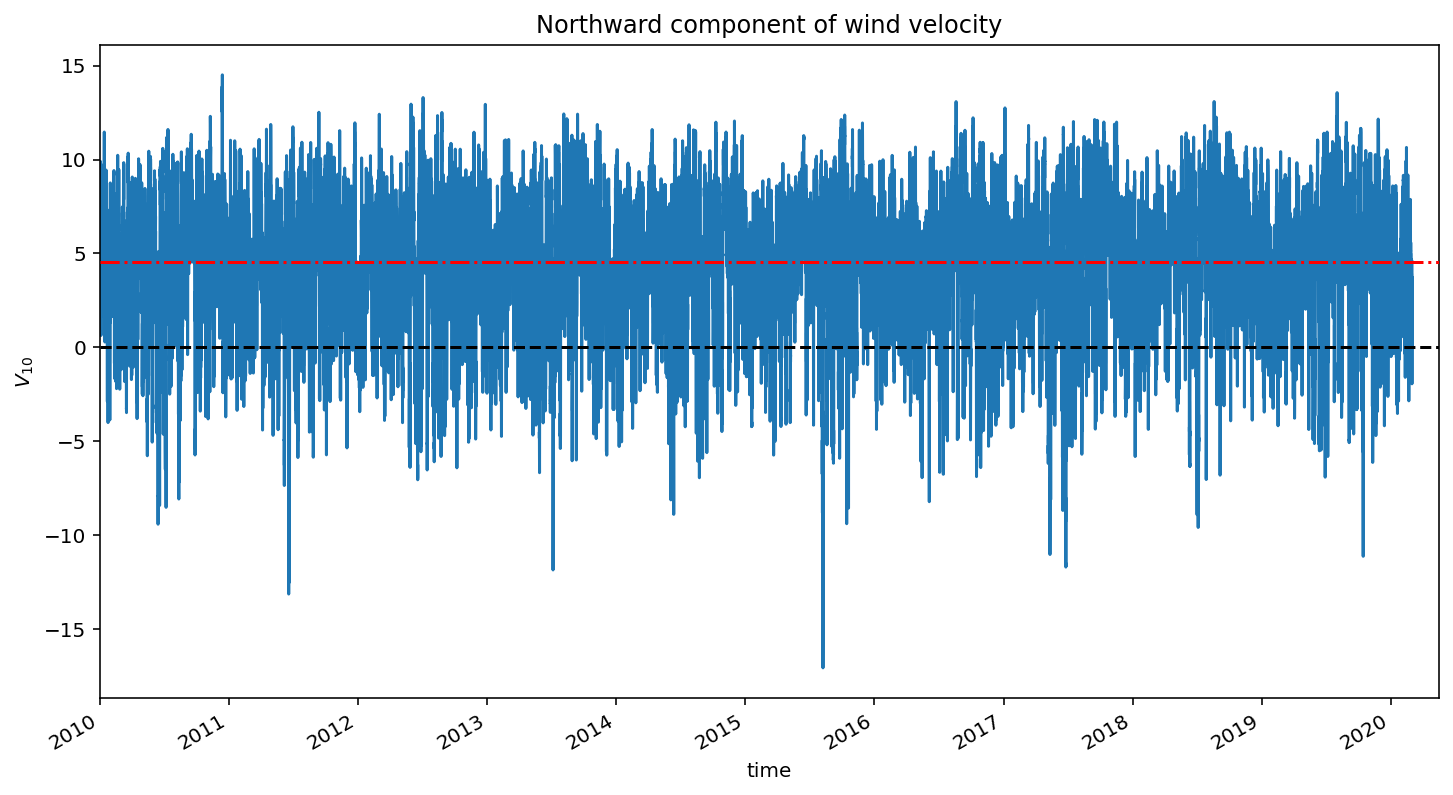

In [4]:
# plot unfiltered time series
ldv.plot()
plt.hlines(0,ldv.time[0],ldv.time[-1],linestyles='dashed',zorder=10)
plt.hlines(ldv.mean(skipna=True),ldv.time[0],ldv.time[-1],linestyles='dashdot',colors='r',zorder=8)
plt.ylabel('$V_{10}$')
plt.title('Northward component of wind velocity')
plt.xlim(ldv.time[0], ldv.time[-1])

In the above plot the red dot-dashed line is the mean value of the norward component of wind velocity for the entire time series.

In [ ]:
# Goal: low-pass filter the data to separate it into a diurnal/higher-frequency part and a low frequency(~synoptic/seasonal) part
# This should work approximately like the pl66tn filter, maybe a python version exists? I couldn't find one, so I "translated" it

# ldvLo = ldv.copy(data=physoce.tseries.pl66(ldv.data))

In [5]:
# pl66 filter with function that I transcribed
ldvLo = ldv.copy(data=(pypl66(ldv.data)).T)
ldvLo

number of weights = 66


<xarray.DataArray (variable: 1, time: 90934)>
array([[8.149175, 8.134132, 8.071646, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
    longitude  float32 -71.75
    latitude   float32 -30.25
    expver     int32 1
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-05-16T21:00:00
  * variable   (variable) <U3 'v10'
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-21 20:05:55 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
ldvHi = ldv - ldvLo
ldvHi

<xarray.DataArray (variable: 1, time: 90934)>
array([[ 0.,  0.,  0., ..., nan, nan, nan]], dtype=float32)
Coordinates:
    longitude  float32 -71.75
    latitude   float32 -30.25
    expver     int32 1
  * time       (time) datetime64[ns] 2010-01-01 ... 2020-05-16T21:00:00
  * variable   (variable) <U3 'v10'

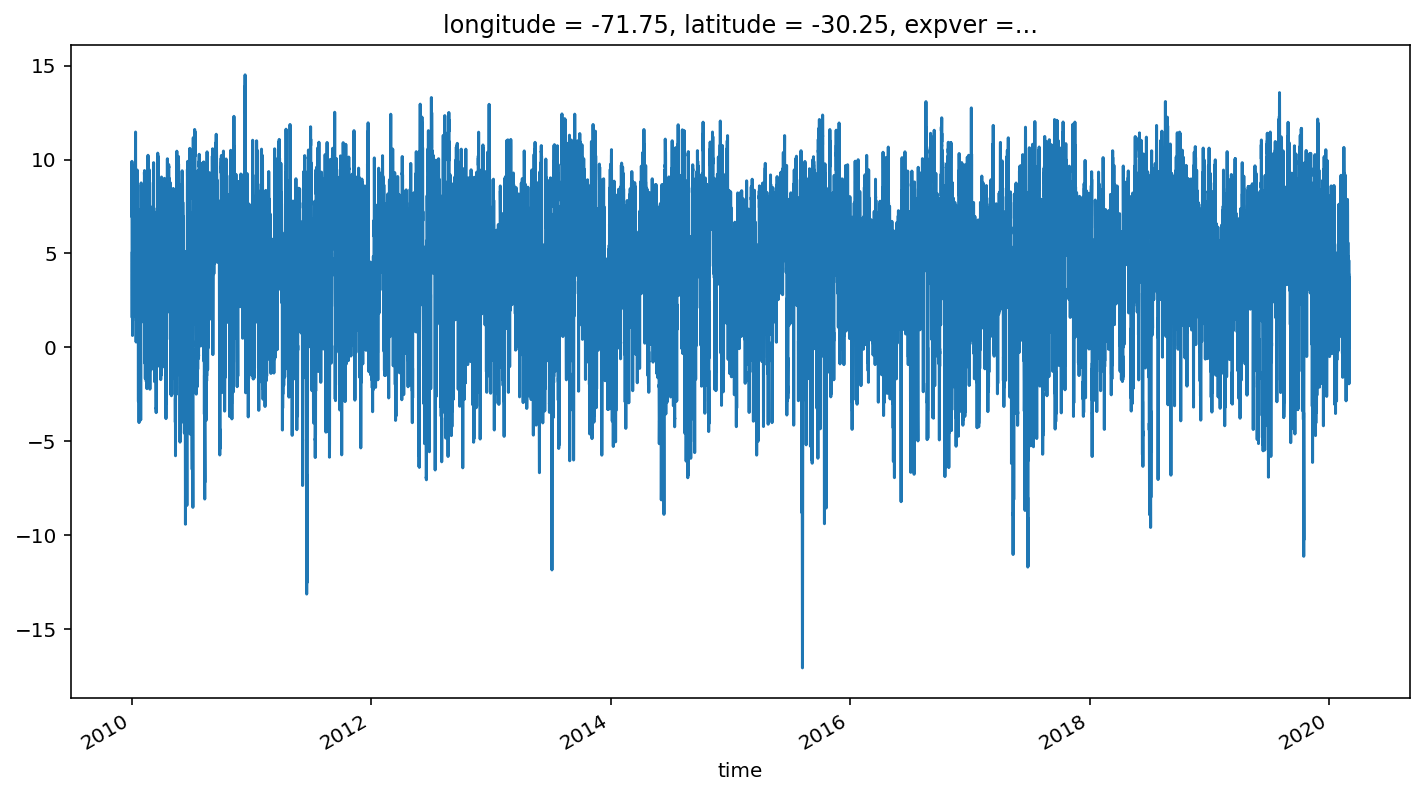

In [6]:
ldvLo.plot()

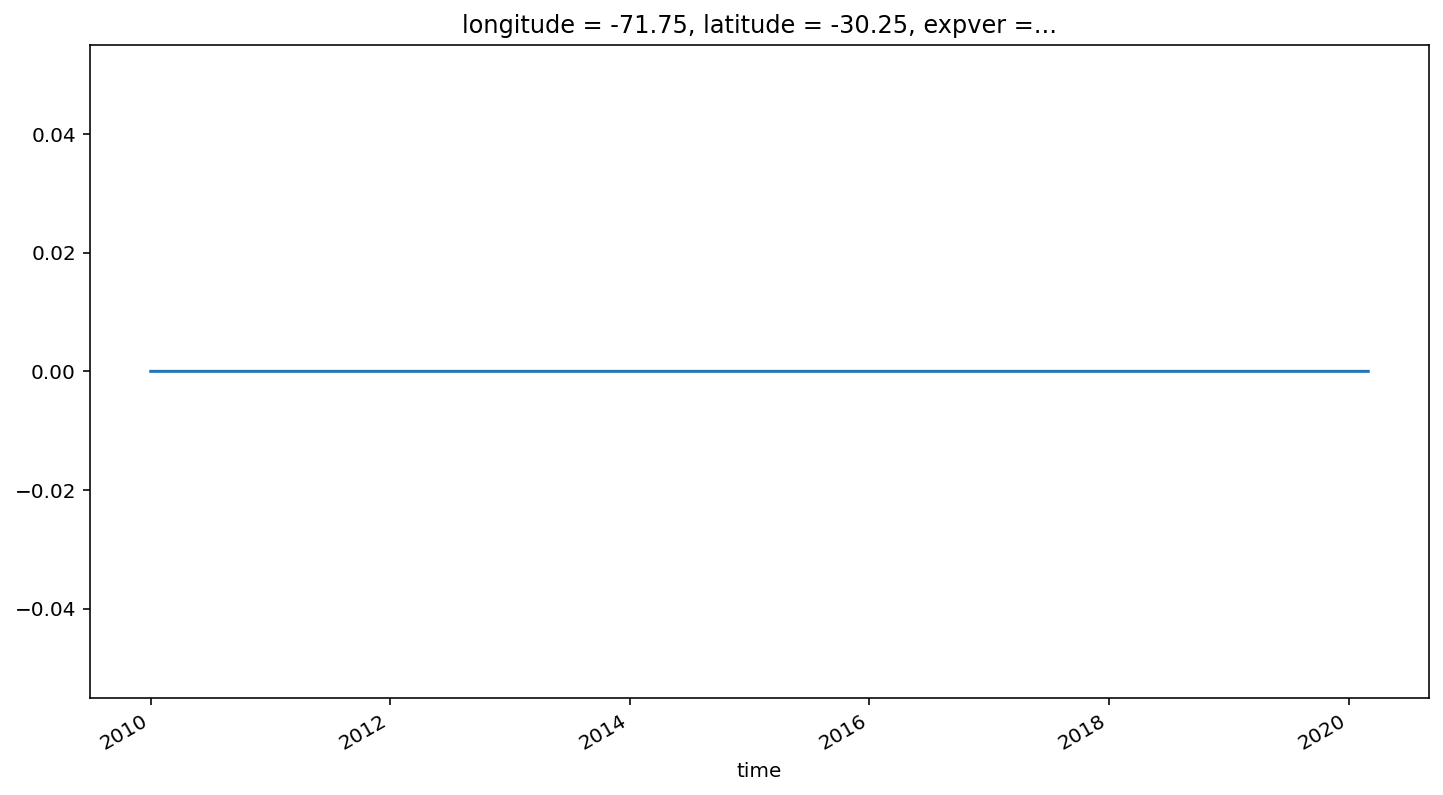

In [8]:
ldvHi.plot()